********************************************************************************************************************************
# ML Lab 10 - End to End ML Case study [Spaceship Titanic]

<hr/>

By: **Virendra Singh** <br>
Linkedin: https://www.linkedin.com/in/singhviren7/
<hr/>

## Lab Overview  
### Objectives

- Load a Dataset, and compare at least two different algorithms and choose the best one
- Use suitable Data Preprocessing and Feature Selection/Engineering Methods
- Fine tune the model and hyper parameters and Finalise the Model
- Make the model deployment-ready by giving User-Input provision

<hr>


##### Kaggle - Spaceship Titanic


##### Link: https://www.kaggle.com/competitions/spaceship-titanic/overview

<hr>

### Problem Definition
- We have to explore on the data, data preprocessing and various features. 
- Data analysis EDA to be done with various visulization and dealing with odd features.
- Chacking the effect of changing parameters and tuning model. 
- Comparing the accuracies, and provide visualizations and interpretations for the evaluation metrices.

### Approach
`Data exploration is the first step of data analysis used to explore and visualize data to uncover insights from the start or identify areas or patterns to dig into more.`
- First load the data and explore it's various features and parameters.
- In EDA part using visulization various plota are drawn and different inshights are gathered.
- Creating new features in data.
- Preaper the data for modling. Using Descision Trees we will predict the values and find out the different parameters.
- Applying the model before and after applying pca and lda.
- Compare different values and explote the parameters of Different Algorithms.
- Using the Ensembles, Cross Validation and Grid Search CV.

<hr>

In [1]:
# Importing the libraries.
from pyforest import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## Dataset Information:
- `In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.`

##### Dataset Link: https://www.kaggle.com/competitions/spaceship-titanic/data


#### File and Data Field Descriptions.
- train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
    - PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
    - HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
    - CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    - Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    - Destination - The planet the passenger will be debarking to.
    - Age - The age of the passenger.
    - VIP - Whether the passenger has paid for special VIP service during the voyage.     
    - RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    - Name - The first and last names of the passenger.   
    - Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
- test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
- sample_submission.csv - A submission file in the correct format.
    - PassengerId - Id for each passenger in the test set.   
    - Transported - The target. For each passenger, predict either True or False.

<hr>

### Loading the dataset:

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
print ("Dataset Lenght:: ", len(df))
print ("Dataset Shape:: ", df.shape)

Dataset Lenght::  8693
Dataset Shape::  (8693, 14)


In [5]:
df.describe() # Five number summary:

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


- Different features of categorical, int and float.

#### Checking missing values:

In [7]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are number of missing values in dataset.

<hr>

### Handling missing values:

In [8]:
df.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [9]:
df.HomePlanet=df.HomePlanet.fillna("Earth") # Filling with mode.

In [10]:
df.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [11]:
df.CryoSleep=df.CryoSleep.fillna(False)    # Filling with mode.

In [12]:
df.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [13]:
df.Destination=df.Destination.fillna("TRAPPIST-1e")     # Filling with mode.

In [14]:
df.Age.describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [15]:
df.Age=df.Age.fillna(29)   # Filling with mean.

In [16]:
df.VIP.value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [17]:
df.VIP=df.VIP.fillna(False)    # Filling with mode.

In [18]:
df.RoomService.describe()

count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64

In [19]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.831474,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339075,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [20]:
# Filling with min.
df.RoomService=df.RoomService.fillna(00.0)
df.FoodCourt=df.FoodCourt.fillna(00.0)
df.ShoppingMall=df.ShoppingMall.fillna(00.0)
df.Spa=df.Spa.fillna(00.0)
df.VRDeck=df.VRDeck.fillna(00.0)

In [21]:
df.Cabin=df.Cabin.fillna('G/160/P')    # Filling with mode.

In [22]:
# Changing datatype from bool to str:
df.CryoSleep = df.CryoSleep.astype("str")
df.VIP = df.VIP.astype("str")
df.Transported = df.Transported.astype("str")

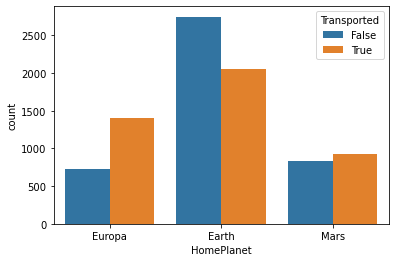

In [23]:
# Checling Status in different planet:
sns.countplot(x="HomePlanet",hue="Transported",data=df)
plt.show()

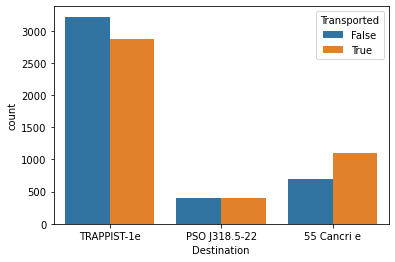

In [24]:
# Checling Status in different Deck:
sns.countplot(x="Destination",hue="Transported",data=df)
plt.show()

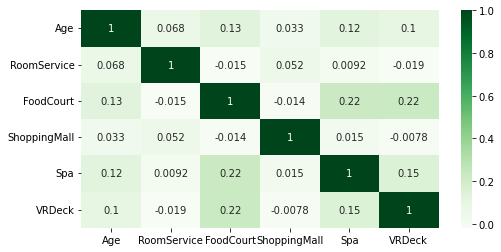

In [25]:
plt.figure(figsize=(8,4))
corr=df[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].corr()
sns.heatmap(corr,cmap="Greens",annot=True)
plt.show()

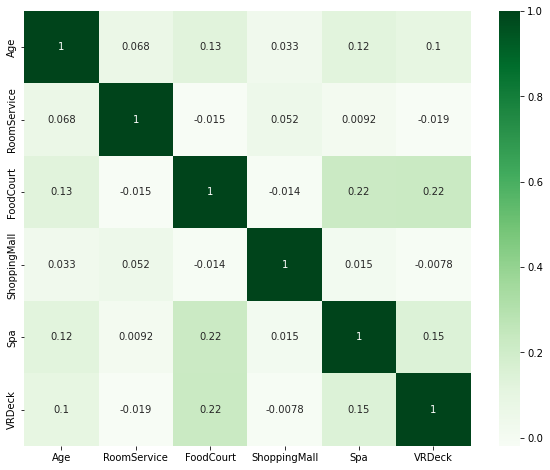

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap="Greens",annot=True)
plt.show()

<hr>

- We can observe the corelation between various features
   - CyroSleep and Transported.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   object 
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 950.9+ KB


<Figure size 720x576 with 0 Axes>

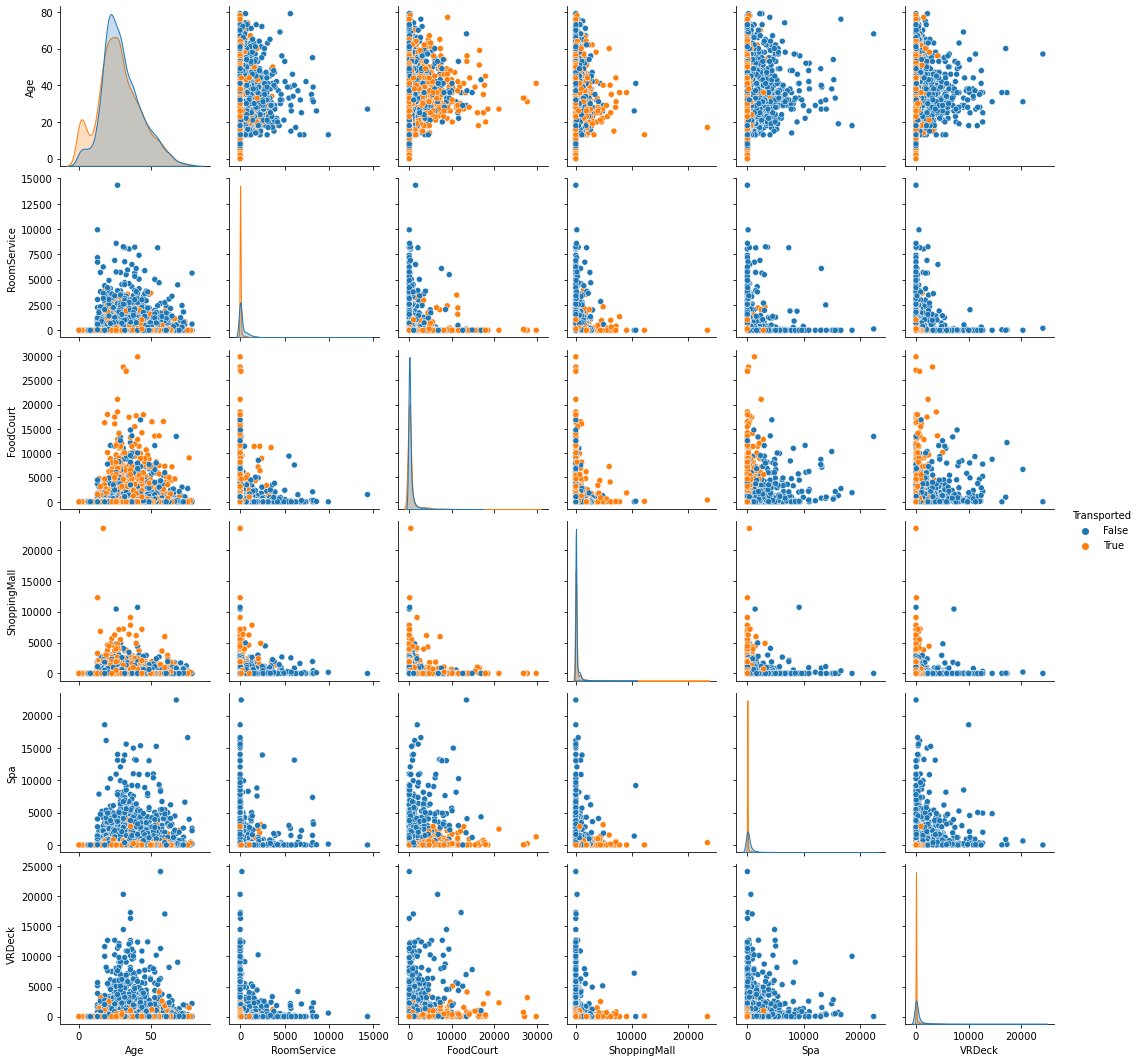

In [28]:
plt.figure(figsize=(10,8))
sns.pairplot(df, hue='Transported')
plt.show()

<hr>

### Feature Engineering:
#### Creating New Columns:

- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    - deck / num / side

In [29]:
# Splitting Cabin Observation and creating two new columns named "Deck" and "Side".
raw=df["Cabin"].str.split("/", n=2, expand=True)

In [30]:
df["Deck"]=raw[0]
df["Side"]=raw[2]

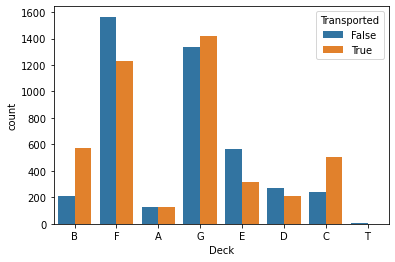

In [31]:
# Checling Status in different Deck:
sns.countplot(x="Deck",hue="Transported",data=df)
plt.show()

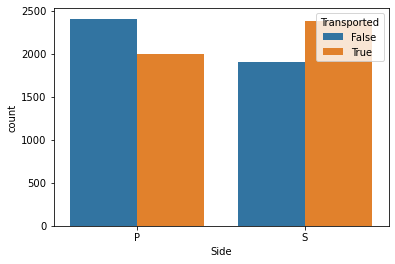

In [32]:
# Checling Status in different Side:
sns.countplot(x="Side",hue="Transported",data=df)
plt.show()

In [33]:
df.head()    # Checking.

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S


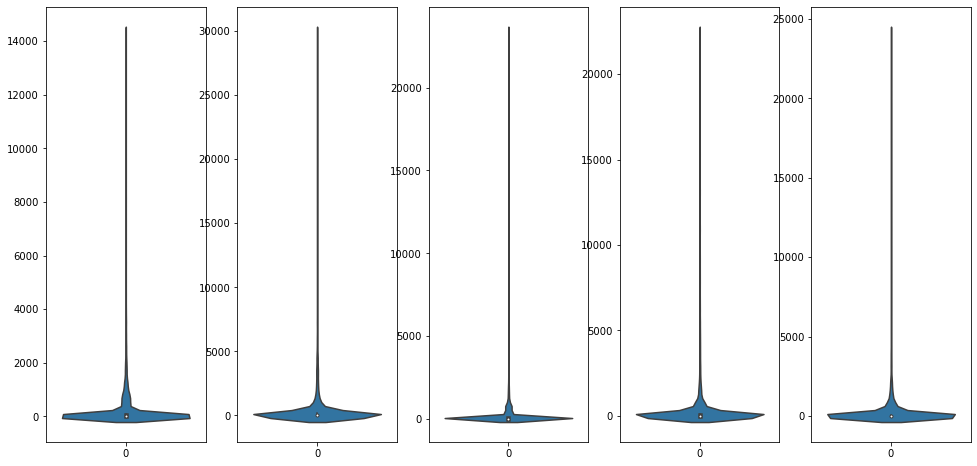

In [34]:
plt.figure(figsize=(20,8))
plt.subplot(151)

# Different Spendings:
plt.subplot(162)
sns.violinplot(data=df["RoomService"])

plt.subplot(163)
sns.violinplot(data=df["FoodCourt"])

plt.subplot(164)
sns.violinplot(data=df["ShoppingMall"])

plt.subplot(165)
sns.violinplot(data=df["Spa"])

plt.subplot(166)
sns.violinplot(data=df["VRDeck"])

plt.show()

- Adding all the spending in the ship and creating a new column as "TotalSpending".

In [35]:
df["TotalSpendings"] = (df.RoomService + df.FoodCourt + df.ShoppingMall + df.Spa + df.VRDeck)

In [36]:
df["TotalSpendings"] = df["TotalSpendings"].fillna(0.00)  # Filling Missing values with 0

In [37]:
# Again checking missing values:
df.isnull().sum()

PassengerId         0
HomePlanet          0
CryoSleep           0
Cabin               0
Destination         0
Age                 0
VIP                 0
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Name              200
Transported         0
Deck                0
Side                0
TotalSpendings      0
dtype: int64

- Only few missing values in feature "Name" which are mostly unique values. so, we will drop this feature further.

In [38]:
df["TotalSpendings"].describe()

count     8693.000000
mean      1440.866329
std       2803.045694
min          0.000000
25%          0.000000
50%        716.000000
75%       1441.000000
max      35987.000000
Name: TotalSpendings, dtype: float64

In [39]:
(df["TotalSpendings"]==0).sum()

3653

- We can observe that there are many values as 0 so, there is no spending at all. 
- Creating new feature as "SpendingStatus" which will tell that there is any spending or not.

In [40]:
df["SpendingStatus"] = np.where(df["TotalSpendings"]==0, "No", "Yes")

In [41]:
df["SpendingStatus"].value_counts()

Yes    5040
No     3653
Name: SpendingStatus, dtype: int64

- Is_Single Feature. Returns Single if Passenger has no other Group Member.
- So creating new feature as "Is_Single".

In [42]:
# Spliting the observations:
df['GroupNumber'] = df.PassengerId.str.split('_').str[0]

In [43]:
df["InGroupNumber"] = df.PassengerId.str.split('_').str[1]

In [44]:
# Creating new categories as 'Single' and 'Not-Single'.
x = df.groupby('GroupNumber').InGroupNumber.apply(lambda Z: 'Single' if Z.max() == '01' else 'Not-Single').reset_index()
x.columns = ['GroupNumber', 'Is_Single']

In [45]:
df = df.merge(x, on='GroupNumber')

In [46]:
df.head(2) 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,Deck,Side,TotalSpendings,SpendingStatus,GroupNumber,InGroupNumber,Is_Single
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,B,P,0.0,No,0001,01,Single
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,F,S,736.0,Yes,0002,01,Single


- Creating a feature as number of persons travelling and creating the group size as 'Small', 'Medium' and 'Large' in 'GroupSize' column.

In [47]:
x = df.groupby('GroupNumber').InGroupNumber.apply(lambda Z: Z.max()).reset_index()
x.columns = ['GroupNumber', 'GroupSize']
df = df.merge(x, on='GroupNumber')

In [48]:
df.GroupSize = df.GroupSize.astype(int)

In [49]:
df.GroupSize = pd.cut(df.GroupSize, 3, labels=['Small', 'Medium', 'Large'])

In [50]:
df.GroupSize.value_counts()

Small     7507
Medium     677
Large      509
Name: GroupSize, dtype: int64

- Age:
   - Binning the Age of passengers in different bins. Here 5 bins are created depending on the Age distributions.

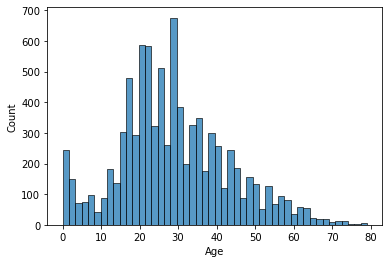

In [51]:
sns.histplot(df["Age"])
plt.show()

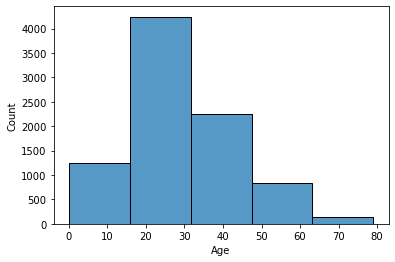

In [52]:
sns.histplot(df["Age"],bins=5)
plt.show()

In [53]:
# Binning the Age
df.Age = pd.qcut(df.Age, 5, labels=['A', 'B', 'C', 'D', 'E'])

In [54]:
df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,Deck,Side,TotalSpendings,SpendingStatus,GroupNumber,InGroupNumber,Is_Single,GroupSize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,D,False,0.0,0.0,0.0,...,Maham Ofracculy,False,B,P,0.0,No,0001,01,Single,Small
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,B,False,109.0,9.0,25.0,...,Juanna Vines,True,F,S,736.0,Yes,0002,01,Single,Small


#### Scaling the numerical features:

In [55]:
# StandartScaler for continous features
df['RoomService'] = StandardScaler().fit_transform(np.array(df['RoomService']).reshape(-1, 1))
df['FoodCourt'] = StandardScaler().fit_transform(np.array(df['FoodCourt']).reshape(-1, 1))
df['ShoppingMall'] = StandardScaler().fit_transform(np.array(df['ShoppingMall']).reshape(-1, 1))
df['Spa'] = StandardScaler().fit_transform(np.array(df['Spa']).reshape(-1, 1))
df['VRDeck'] = StandardScaler().fit_transform(np.array(df['VRDeck']).reshape(-1, 1))
df['TotalSpendings'] = StandardScaler().fit_transform(np.array(df['TotalSpendings']).reshape(-1, 1))

In [56]:
df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,Deck,Side,TotalSpendings,SpendingStatus,GroupNumber,InGroupNumber,Is_Single,GroupSize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,D,False,-0.333105,-0.281027,-0.283579,...,Maham Ofracculy,False,B,P,-0.514066,No,0001,01,Single,Small
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,B,False,-0.168073,-0.275387,-0.241771,...,Juanna Vines,True,F,S,-0.251479,Yes,0002,01,Single,Small
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,E,True,-0.268001,1.959998,-0.283579,...,Altark Susent,False,A,S,3.190333,Yes,0003,01,Not-Single,Small


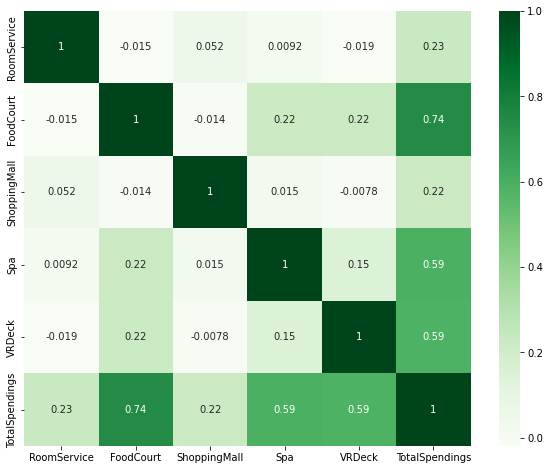

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap="Greens",annot=True)
plt.show()

- We can observe the corelation between various features
   - FoodCourt, Spa, VerDeck and TotalSpending
   - CyroSleep and Transported.

<hr>

### Preapering for modeling:

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [59]:
# Target Variable:
df["CryoSleep"]=le.fit_transform(df["CryoSleep"])
df["VIP"]=le.fit_transform(df["VIP"])

In [60]:
df["Transported"]=np.where(df["Transported"]=="True", 1.0, 0.0)

In [61]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Deck', 'Side', 'TotalSpendings',
       'SpendingStatus', 'GroupNumber', 'InGroupNumber', 'Is_Single',
       'GroupSize'],
      dtype='object')

- Dropping the columns:
    - "Cabin", "Name", "PassengerId", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck".

In [62]:
df=df.drop(["Cabin", "Name", "PassengerId", "InGroupNumber", "GroupNumber"], axis=1)

In [63]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Deck',
       'Side', 'TotalSpendings', 'SpendingStatus', 'Is_Single', 'GroupSize'],
      dtype='object')

In [64]:
df.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,TotalSpendings,SpendingStatus,Is_Single,GroupSize
0,Europa,0,TRAPPIST-1e,D,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0.0,B,P,-0.514066,No,Single,Small
1,Earth,0,TRAPPIST-1e,B,0,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,1.0,F,S,-0.251479,Yes,Single,Small
2,Europa,0,TRAPPIST-1e,E,1,-0.268001,1.959998,-0.283579,5.695623,-0.219796,0.0,A,S,3.190333,Yes,Not-Single,Small


In [65]:
### Preapering dataset:

In [66]:
# DV and IV:
X1=df.drop("Transported", axis=1)
y1=df["Transported"]

In [67]:
# DV and IV:
X2=df.drop("Transported", axis=1)
y2=df["Transported"]   # for future use.

In [68]:
print(X1.shape)
print(y1.shape)

(8693, 16)
(8693,)


In [69]:
# Encoding:
# Creating the dummies of categorical variables:

X1=pd.get_dummies(X1)

In [70]:
X1.shape

(8693, 36)

In [71]:
X1.head(2)

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpendings,HomePlanet_Earth,HomePlanet_Europa,...,Deck_T,Side_P,Side_S,SpendingStatus_No,SpendingStatus_Yes,Is_Single_Not-Single,Is_Single_Single,GroupSize_Small,GroupSize_Medium,GroupSize_Large
0,0,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,-0.514066,0,1,...,0,1,0,1,0,0,1,1,0,0
1,0,0,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,-0.251479,1,0,...,0,0,1,0,1,0,1,1,0,0


<hr>

In [72]:
# Calling the algorithm libraries:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [73]:
lg = LogisticRegression()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
xgbo = XGBClassifier()
gbm = GradientBoostingClassifier()

In [74]:
# Splitting the data in train and test:
X_train, X_test , y_train, y_test = train_test_split(X1,y1, test_size = 0.20, random_state = 123)

### Modling:

In [75]:
# Logistic Regression
lg=LogisticRegression()
model_lg = lg.fit(X_train, y_train)
pred_lg = lg.predict(X_test)
accuracy_score(y_test, pred_lg)
ac_lgl2 = round(accuracy_score(y_test, pred_lg)*100, 2)
print("Model Accuracy Score:",ac_lgl2)

Model Accuracy Score: 80.74


In [76]:
# Logistic Regression #l1
lg = LogisticRegression(penalty='l1', solver='saga')
model_lg = lg.fit(X_train, y_train)
pred_lg = lg.predict(X_test)
accuracy_score(y_test, pred_lg)
ac_lgl1 = round(accuracy_score(y_test, pred_lg)*100, 2)
print("Model Accuracy Score:",ac_lgl1)

Model Accuracy Score: 80.85


In [77]:
# Decision Tree Model
model_tree = tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)
accuracy_score(y_test, pred_tree)
ac_dt1 = round(accuracy_score(y_test, pred_tree)*100, 2)
print("Model Accuracy Score:",ac_dt1)

Model Accuracy Score: 74.99


In [78]:
# Decision Tree Model
dt = DecisionTreeClassifier(criterion='entropy')
model_tree = tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)
accuracy_score(y_test, pred_tree)
ac_dt2 = round(accuracy_score(y_test, pred_tree)*100, 2)
print("Model Accuracy Score:",ac_dt2)

Model Accuracy Score: 74.07


In [79]:
# Random Forest
model_rf = rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
accuracy_score(y_test, pred_rf)
ac_rf1 = round(accuracy_score(y_test, pred_rf)*100, 2)
print("Model Accuracy Score:",ac_rf1)

Model Accuracy Score: 80.05


In [80]:
# Random Forest   #entropy
rf = RandomForestClassifier(criterion='entropy')
model_rf = rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
accuracy_score(y_test, pred_rf)
ac_rf2 = round(accuracy_score(y_test, pred_rf)*100, 2)
print("Model Accuracy Score:",ac_rf2)

Model Accuracy Score: 80.16


In [81]:
# ADABOOST MODEL
model_ada = ada.fit(X_train, y_train)
pred_ada = ada.predict(X_test)
accuracy_score(y_test, pred_ada)
ac_ada = round(accuracy_score(y_test, pred_ada)*100, 2)
print("Model Accuracy Score:",ac_ada)

Model Accuracy Score: 80.1


In [82]:
# GBM MODEL
model_gbm = gbm.fit(X_train, y_train)
pred_gbm = gbm.predict(X_test)
accuracy_score(y_test, pred_gbm)
ac_gbm = round(accuracy_score(y_test, pred_gbm)*100, 2)
print("Model Accuracy Score:",ac_gbm)

Model Accuracy Score: 81.43


In [83]:
# XGBOOST
model_xgbo = xgbo.fit(X_train, y_train)
pred_xgbo = xgbo.predict(X_test)
accuracy_score(y_test, pred_xgbo)
ac_xgbo = round(accuracy_score(y_test, pred_xgbo)*100, 2)
print("Model Accuracy Score:",ac_xgbo)

[23:47:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy Score: 80.74


In [84]:
# Voting Classifire
from sklearn.ensemble import VotingClassifier
v = VotingClassifier(estimators=[("Logreg", lg),("Trees", tree),("RF", rf), ("ADA", ada),("XG", xgbo), ("GBM", gbm)])

In [85]:
newmodel_vc = v.fit(X_train, y_train)
newmodel_pred = v.predict(X_test)
accuracy_score(y_test, newmodel_pred)

ac_vc = round(accuracy_score(y_test, newmodel_pred)*100, 2)
print("Model Accuracy Score:",ac_vc)

[23:47:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy Score: 81.66


In [86]:
# Stacking Classifire
import lightgbm as lgb
clflgb = lgb.LGBMClassifier()
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB

In [87]:
level0 = list()
level0.append(('RF', RandomForestClassifier()))

level0.append(('LGBM', lgb.LGBMClassifier(boosting_type='gbdt', learning_rate=0.15,
                              max_depth=15, n_estimators=30, num_leaves=35, random_state=123)))

level0.append(('LR', LogisticRegression(solver='liblinear', random_state=13, max_iter=2000)))

level1 = GaussianNB()
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

In [88]:
model_sc = model.fit(X_train, y_train)
pred_sc = model_sc.predict(X_test)
accuracy_score(y_test, pred_sc)

ac_sc = round(accuracy_score(y_test, pred_sc)*100, 2)
print("Model Accuracy Score:",ac_sc)

Model Accuracy Score: 81.37


#### Comparing models:

In [89]:
smry = pd.DataFrame()

lgl1 = {"Algorithm Name":"Logisric Regression l1", "Accuracy Score":ac_lgl1}
lgl2 = {"Algorithm Name":"Logisric Regression l2", "Accuracy Score":ac_lgl2}
dt1 = {"Algorithm Name":"Decision Tree with 'gini'" , "Accuracy Score":ac_dt1}
dt2 = {"Algorithm Name":"Decision Tree with 'entropy'" , "Accuracy Score":ac_dt2}
rf1 = {"Algorithm Name":"Random Forest with 'gini' " , "Accuracy Score":ac_rf1}
rf2 = {"Algorithm Name":"Random Forest with 'entropy' " , "Accuracy Score":ac_rf2}
ada = {"Algorithm Name":"Adaboost", "Accuracy Score":ac_ada}
gbm = {"Algorithm Name":"Light GBM", "Accuracy Score":ac_gbm}
xgbo = {"Algorithm Name":"XGboost", "Accuracy Score":ac_xgbo}
vc = {"Algorithm Name":"Voting Classifire", "Accuracy Score":ac_vc}
sc = {"Algorithm Name":"Stacking Classifire", "Accuracy Score":ac_sc}

algorithm=[lgl1, lgl2, dt1, dt2, rf1, rf2, ada, gbm, xgbo, vc, sc]

for i in algorithm:
    smry = smry.append(i, ignore_index=True)
display(smry)

,Algorithm Name,Accuracy Score
0,Logisric Regression l1,80.85
1,Logisric Regression l2,80.74
2,Decision Tree with 'gini',74.99
3,Decision Tree with 'entropy',74.07
4,Random Forest with 'gini',80.05
5,Random Forest with 'entropy',80.16
6,Adaboost,80.10
7,Light GBM,81.43
8,XGboost,80.74
9,Voting Classifire,81.66


- We can observe that the Logistic model, Random Forest and Ensemble Models are performing well on dataset.
- Adaboost, Light GBM, XGboost and Voting Classifire, Stacking Classifire are working really well on dataset.

<hr>

### PCA

In [90]:
scaler = StandardScaler().fit(X1)
X_standardised = scaler.transform(X1)

In [91]:
X_standardised

array([[-0.73277002, -0.15306307, -0.33310466, ...,  0.39747438,
        -0.2906133 , -0.2493883 ],
       [-0.73277002, -0.15306307, -0.16807343, ...,  0.39747438,
        -0.2906133 , -0.2493883 ],
       [-0.73277002,  6.53325471, -0.2680006 , ...,  0.39747438,
        -0.2906133 , -0.2493883 ],
       ...,
       [-0.73277002, -0.15306307, -0.33310466, ...,  0.39747438,
        -0.2906133 , -0.2493883 ],
       [-0.73277002, -0.15306307, -0.33310466, ...,  0.39747438,
        -0.2906133 , -0.2493883 ],
       [-0.73277002, -0.15306307, -0.14233462, ...,  0.39747438,
        -0.2906133 , -0.2493883 ]])

In [92]:
principal_component_analysis = PCA(n_components = 3)
results = principal_component_analysis.fit(X_standardised)
results_transformed = results.transform(X_standardised)

<IPython.core.display.Javascript object>

In [93]:
pca_df = pd.DataFrame(data = results_transformed)
pca_df.head()

,0,1,2
0,0.224287,1.075215,0.971380
1,0.066709,-2.728305,-0.032892
2,6.159136,2.000340,0.941683
3,3.630988,1.350295,0.167036
4,-0.175074,-2.154822,-0.407077


In [94]:
X_train, X_test, y_train, y_test = train_test_split(pca_df, y1, test_size=0.20, random_state=123)

# Importing:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

# Decision Tree Model
model_pca = dt.fit(X_train, y_train)
pred_pca = model_pca.predict(X_test)
ac_dtpca = round(accuracy_score(y_test, pred_pca)*100, 2)

print("Accuracy Score:",ac_dtpca)

Accuracy Score: 67.22


In [95]:
X_train, X_test, y_train, y_test = train_test_split(pca_df, y1, test_size=0.20, random_state=123)

# Logistic Regression
lg=LogisticRegression()
model_lg = lg.fit(X_train, y_train)
pred_lg = lg.predict(X_test)
accuracy_score(y_test, pred_lg)
ac_lgl1pca = round(accuracy_score(y_test, pred_lg)*100, 2)
print("Model Accuracy Score:",ac_lgl1pca)

Model Accuracy Score: 74.07


In [96]:
X_train, X_test, y_train, y_test = train_test_split(pca_df, y1, test_size=0.20, random_state=123)

# Random Forest
model_rf = rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
accuracy_score(y_test, pred_rf)
ac_rf1pca = round(accuracy_score(y_test, pred_rf)*100, 2)
print("Model Accuracy Score:",ac_rf1pca)

Model Accuracy Score: 72.28


In [97]:
print("*" *28)
print("FINAL REPORT")
print("-" *28)
print("Accuracy Score without PCA")
print("Decision Tree:",ac_dt1)
print("Logistic Regression:", ac_lgl1)
print("Random Forest:", ac_rf1)
print("-" *28)
print("After applying PCA:")
print("Accuracy Score without PCA")
print("Decision Tree:",ac_dtpca)
print("Logistic Regression:", ac_lgl1pca)
print("Random Forest:", ac_rf1pca)
print("*" *28)

****************************
FINAL REPORT
----------------------------
Accuracy Score without PCA
Decision Tree: 74.99
Logistic Regression: 80.85
Random Forest: 80.05
----------------------------
After applying PCA:
Accuracy Score without PCA
Decision Tree: 67.22
Logistic Regression: 74.07
Random Forest: 72.28
****************************


<hr>

### Hyperparameter tuning in Logistic Regression and Random Forest Algorithms:

In [98]:
# Grid search cross validation
X_train, X_test , y_train, y_test = train_test_split(X1,y1, test_size = 0.20, random_state = 123)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.7842929794095758


In [99]:
# Training with best parameters:
logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(X_train,y_train)
print("Accuracy Score: ",logreg2.score(X_test,y_test))

Accuracy Score:  0.8073605520414031


<hr>

In [100]:
# Grid Search CV ~ Random Forest:
X_train, X_test , y_train, y_test = train_test_split(X1,y1, test_size = 0.20, random_state = 123)

rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [101]:
# Fitting Best Parameters:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')
rfc1.fit(X_train, y_train)
pred=rfc1.predict(X_test)
ac_rfcv = accuracy_score(y_test,pred)
print("Accuracy for Random Forest on CV data: ",round(ac_rfcv*100, 2))

Accuracy for Random Forest on CV data:  81.14


- Both the Algorithms are performing well on dataset.

<hr>

### Feature Importance:

Feature: 0, Score: 0.05109
Feature: 1, Score: 0.00234
Feature: 2, Score: 0.07984
Feature: 3, Score: 0.09467
Feature: 4, Score: 0.08122
Feature: 5, Score: 0.09522
Feature: 6, Score: 0.08509
Feature: 7, Score: 0.14274
Feature: 8, Score: 0.02234
Feature: 9, Score: 0.01332
Feature: 10, Score: 0.01056
Feature: 11, Score: 0.01063
Feature: 12, Score: 0.00684
Feature: 13, Score: 0.01199
Feature: 14, Score: 0.01077
Feature: 15, Score: 0.01223
Feature: 16, Score: 0.01156
Feature: 17, Score: 0.01106
Feature: 18, Score: 0.01205
Feature: 19, Score: 0.00256
Feature: 20, Score: 0.00568
Feature: 21, Score: 0.00655
Feature: 22, Score: 0.00456
Feature: 23, Score: 0.01863
Feature: 24, Score: 0.01791
Feature: 25, Score: 0.01917
Feature: 26, Score: 0.00004
Feature: 27, Score: 0.01259
Feature: 28, Score: 0.01160
Feature: 29, Score: 0.05004
Feature: 30, Score: 0.04853
Feature: 31, Score: 0.00923
Feature: 32, Score: 0.00970
Feature: 33, Score: 0.00691
Feature: 34, Score: 0.00534
Feature: 35, Score: 0.00542


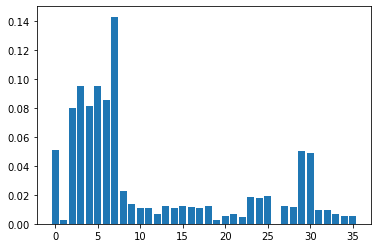

In [102]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X1, y1)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

<hr>

### Prediction:

In [103]:
# IV & DV:
X2=df.drop("Transported", axis=1)
y2=df["Transported"]

In [104]:
# Using LbelEncoder for taking user input easily:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X2.HomePlanet = le.fit_transform(X2.HomePlanet)
X2.Destination = le.fit_transform(X2.Destination )
X2.Age= le.fit_transform(X2.Age)
X2.Deck = le.fit_transform(X2.Deck)
X2.Side = le.fit_transform(X2.Side)
X2.SpendingStatus = le.fit_transform(X2.SpendingStatus)
X2.Is_Single = le.fit_transform(X2.Is_Single)
X2.GroupSize = le.fit_transform(X2.GroupSize)

In [112]:
# Fitting Best Parameters:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')
rfc1.fit(X_train, y_train)
pred=rfc1.predict(X_test)
ac_rfcv = accuracy_score(y_test,pred)
print("Accuracy for Random Forest on CV data: ",round(ac_rfcv*100, 2))

Accuracy for Random Forest on CV data:  81.66


#### Taking User Input:

In [114]:
user_df=pd.DataFrame()
num = int(input("Enter the number of Observations: "))

for i in range(num):
    ui1 = {'HomePlanet':int(input("Enter Code [0,1,2]: ")), 'CryoSleep':int(input("Enter Code [0,1]: ")),
           'Destination':int(input("Enter Code [0,1,2]: ")), 'Age':int(input("Enter Code [0,1,2,3,4]: ")), 
           'VIP':int(input("Enter Code [0,1]: ")), 'RoomService':X2.RoomService.mean(), 'FoodCourt':X2.FoodCourt.mean(), 
           'ShoppingMall':X2.ShoppingMall.mean(), 'Spa':X2.Spa.mean(), 'VRDeck':X2.VRDeck.mean(), 
           'Deck':int(input("Enter Code [0,1,2,3,4,5,6,7]: ")), 'Side':int(input("Enter Code [0,1]: ")), 
           'TotalSpendings':X2.TotalSpendings.mean(), 'SpendingStatus':int(input("Enter Code [0,1]: ")), 
           'Is_Single':int(input("Enter Code [0,1]: ")), 'GroupSize':int(input("Enter Code [0,1,2]: "))}
    user_df = user_df.append(ui1, ignore_index=True)
display(user_df)

Enter the number of Observations: 2
Enter Code [0,1,2]: 0
Enter Code [0,1]: 0
Enter Code [0,1,2]: 0
Enter Code [0,1,2,3,4]: 0
Enter Code [0,1]: 0
Enter Code [0,1,2,3,4,5,6,7]: 0
Enter Code [0,1]: 0
Enter Code [0,1]: 0
Enter Code [0,1]: 0
Enter Code [0,1,2]: 0
Enter Code [0,1,2]: 0
Enter Code [0,1]: 0
Enter Code [0,1,2]: 0
Enter Code [0,1,2,3,4]: 2
Enter Code [0,1]: 1
Enter Code [0,1,2,3,4,5,6,7]: 5
Enter Code [0,1]: 1
Enter Code [0,1]: 1
Enter Code [0,1]: 1
Enter Code [0,1,2]: 2


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side,TotalSpendings,SpendingStatus,Is_Single,GroupSize
0,0.0,0.0,0.0,0.0,0.0,-3.556117e-16,-4.039357e-16,7.862111e-16,-3.202891e-16,2.648801e-17,0.0,0.0,-1.712653e-16,0.0,0.0,0.0
1,0.0,0.0,0.0,2.0,1.0,-3.556117e-16,-4.039357e-16,7.862111e-16,-3.202891e-16,2.648801e-17,5.0,1.0,-1.712653e-16,1.0,1.0,2.0


In [115]:
# Predictions:
# Predicting with Voting Classifire Model
user_pred = rfc1.predict(user_df)

In [116]:
print("Prediction: [0:False, 1:True]")
print(user_pred)

Prediction: [0:False, 1:True]
[0. 0.]


<hr>

## References:
- https://www.kaggle.com/competitions/spaceship-titanic
- https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://scikit-learn.org/stable/modules/cross_validation.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

## Conclusion/Results:
This assignment given us the clear idea about the ML approach and the model creation with best parameters.In preprocessing the PCA, LDA, DataFrame, Visulization, ML/Analysis, libraries, datasets and various subparts of sklearn libraries, it's uses and various method to find out the hidden patterns in data and relationa between various features and data stractures. We explored the different Algorithms and model, it's hyperparameters and various parameters.
*******************************************************************************************************************************